### Implementación -> Ejemplo: Bombillas encendidas.
_Tenemos 5 bombillas y buscamos la combinación que cumpla las siguientes consideraciones:_

1.  *Solo pueden estar 4 bombillas encendidas.*
2.  *Si la bombilla 1 está encendida, la 3 tiene que estar apagada.*


In [2]:
from qubo_framework import utils
dic_nodos = {
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
}

dic_aristas = {
    "1": "3",
}

# Crear el grafo
utils.crear_SimpleGrafo_node_weight(dic_nodos, dic_aristas)

ModuleNotFoundError: No module named 'qubo_framework'

Matriz QUBO:
-------------------------
[[-7.  2. 22.  2.  2.]
 [ 0. -7.  2.  2.  2.]
 [ 0.  0. -7.  2.  2.]
 [ 0.  0.  0. -7.  2.]
 [ 0.  0.  0.  0. -7.]]

HAMILTONIANO DEL SISTEMA:
-------------------------
Término lineal: {'x_0': '-7', 'x_1': '-7', 'x_2': '-7', 'x_3': '-7', 'x_4': '-7'}
Términos cuadráticos: {('x_1', 'x_3'): '2', ('x_4', 'x_3'): '2', ('x_4', 'x_1'): '2', ('x_0', 'x_3'): '2', ('x_0', 'x_1'): '2', ('x_0', 'x_4'): '2', ('x_2', 'x_3'): '2', ('x_2', 'x_1'): '2', ('x_2', 'x_4'): '2', ('x_2', 'x_0'): '22'}
Offset: 18.50

RESULTADOS SIMULATED ANNEALING:
-------------------------
DecodedSolution({x_0:0, x_1:1, x_2:1, x_3:1, x_4:1}, energy=2.500000)

Tiempo de ejecución de Simulated Annealing: 0.0030 segundos


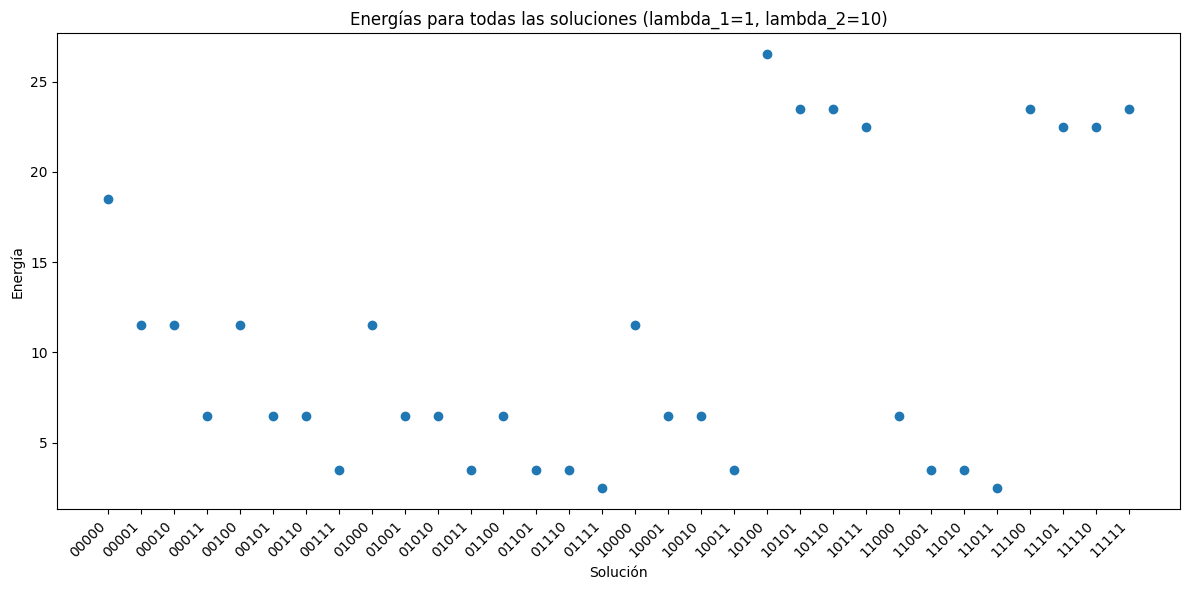

In [ ]:
from pyqubo import Binary, Placeholder
import utils


# Definición de variables con Binary de PyQUBO
X = [Binary(f'x_{i}') for i in range(5)] 

# Definir los coeficientes de Lagrange como Placeholders
lambda_1 = Placeholder("lambda_1")
lambda_2 = Placeholder("lambda_2")

H_1R =lambda_1*(sum(X[i] for i in range(len(X)))-4)**2
H_2R = lambda_2*((X[0]+X[2])-0.5)**2

H=  H_1R + H_2R  
# Asignar los valores de las lambdas (antes de compilar)
lambda_dict = {"lambda_1": 1, "lambda_2": 1}

utils.mostrar_matriz_hamiltoniano(H,lambda_dict=lambda_dict, eliminar_bajo_diagonal=True)
utils.ejecucion_simulated_annealing(H, lambda_dict=lambda_dict) 
utils.visualize_energies(H, lambda_dict=lambda_dict)

Matriz QUBO:
-------------------------
[[-7.  2.  4.  2.  2.]
 [ 0. -7.  2.  2.  2.]
 [ 0.  0. -7.  2.  2.]
 [ 0.  0.  0. -7.  2.]
 [ 0.  0.  0.  0. -7.]]

HAMILTONIANO DEL SISTEMA:
-------------------------
Término lineal: {'x_1': '-7', 'x_2': '-7', 'x_3': '-7', 'x_4': '-7', 'x_5': '-7'}
Términos cuadráticos: {('x_4', 'x_3'): '2', ('x_5', 'x_3'): '2', ('x_5', 'x_4'): '2', ('x_1', 'x_3'): '4', ('x_1', 'x_4'): '2', ('x_1', 'x_5'): '2', ('x_2', 'x_3'): '2', ('x_2', 'x_4'): '2', ('x_2', 'x_5'): '2', ('x_2', 'x_1'): '2'}
Offset: 16.25

RESULTADOS SIMULATED ANNEALING:
-------------------------
DecodedSolution({x_1:0, x_2:1, x_3:1, x_4:1, x_5:1}, energy=0.250000)

Tiempo de ejecución de Simulated Annealing: 0.0030 segundos


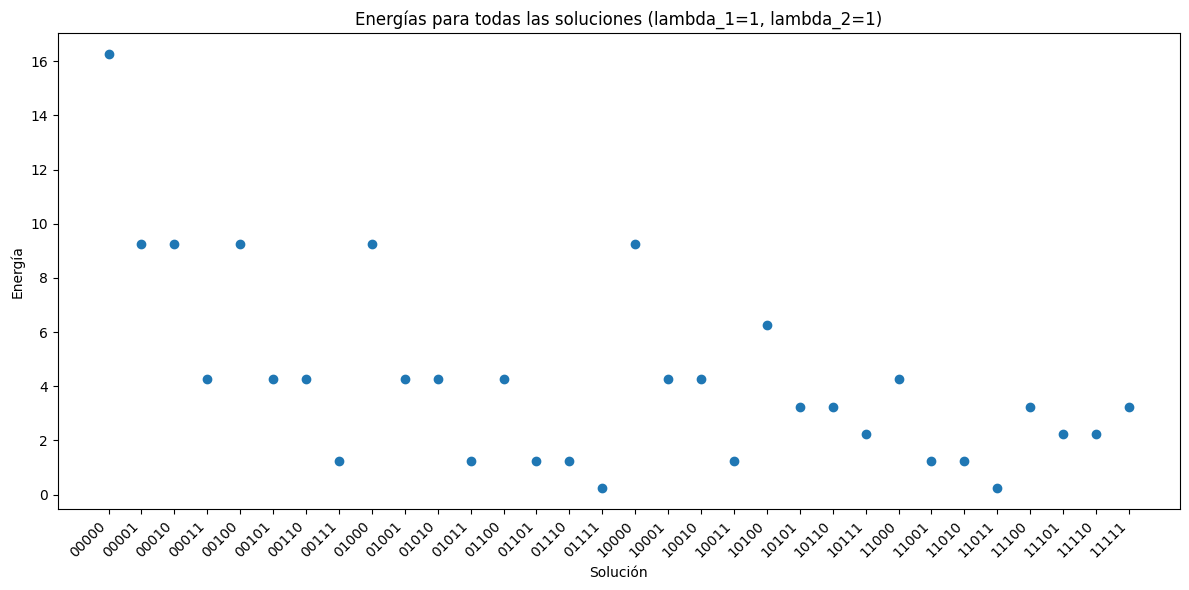

In [14]:
import utils

omegas = {
    1: [1, 2, 3, 4, 5],
    2: [1, 3],
}  # Índices deben coincidir con la definición de x

valores_permitidos = {0:[4], 1:[0,1]}
R, R_QUBO = utils.calcular_conjunto_R_multi_valor(valores_permitidos)
HR_PYQUBO = utils.construccion_HR(omegas, R_QUBO)

# 2. Definir *valores* para los lambdas
lambdas_valores = {"lambda_1": 1, "lambda_2": 1}

# # 3. Visualizar los términos con x continua
# utils.visualizar_parábolas_HR(
#     terminos_HR_continuo, lambdas_valores, x_range=(-20, 20), num_points=100
# )

utils.mostrar_matriz_hamiltoniano(HR_PYQUBO,lambda_dict=lambdas_valores, eliminar_bajo_diagonal=True)
utils.ejecucion_simulated_annealing(HR_PYQUBO, lambda_dict=lambdas_valores) 
utils.visualize_energies(HR_PYQUBO, lambda_dict=lambdas_valores)